#### Table of Contents:
#### Introduction
#### Problem Definition
#### About Project
#### Kernel Goals
#### Gathering Data
#### Prepare Data for Consumption
#### Import Libraries
#### Meet and Greet Data
#### Data Cleaning
#### Data Visualization
#### Duration of pages vs Revenue
#### Month Vs Page value Vs Revenue
#### Bounce & Exit Rates Vs Revenue
#### Visitor type & Exit Rates Vs Revenue
#### Correlation map
#### Strategies to improve conversion rate
#### Feature Engineering and Selection
#### Handling Outliers
#### Special Day- Feature Clubbing !
#### Converting Dtypes
#### Feature Scaling
#### Label Encoding
#### Feature Selection
#### Train and Test Split (80:20)
#### Modelling our Data
#### Selecting the right model- Cross Validation
#### Selecting the right model-Pipeline
#### Random Forest with Hyperparameter Tuning
#### SVC with Hyperparameter Tuning
#### Conclusion

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data
import pandas as pd
import numpy as np

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from datetime import timedelta

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Column Descriptions:

- Administrative: This is the number of pages of this type (administrative) that the user visited.

- Administrative_Duration: This is the amount of time spent in this category of pages.

- Informational: This is the number of pages of this type (informational) that the user visited.

- Informational_Duration: This is the amount of time spent in this category of pages.

- ProductRelated: This is the number of pages of this type (product related) that the user visited.

- ProductRelated_Duration: This is the amount of time spent in this category of pages.

- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

- ExitRates: The percentage of pageviews on the website that end at that specific page.

- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

- More information about how this is calculated

- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

- Month: Contains the month the pageview occurred, in string form.

- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

- Browser: An integer value representing the browser that the user was using to view the page.

- Region: An integer value representing which region the user is located in.

- TrafficType: An integer value representing what type of traffic the user is categorized into. Read more about traffic types here.

- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

- Weekend: A boolean representing whether the session is on a weekend.

- Revenue: A boolean representing whether or not the user completed the purchase.

1.Problem Definition

This data consists of various information related to customer behavior in online shopping websites. It looks like our ecommerce client firm ABC needs to improve on its online sales conversion rate as they are looking forward for a huge investment into their website portal.This dataset helps us to perform Marketing Analytics and understand the KPIs and Metrics related to it. We should also provide marketing strategies to improve their conversion rate by making the customer go through the marketing funnel.



Dataset :

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

Attribute :

Revenue => class whether it can make a revenue or not
Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
Bounce Rate => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
Exit Rate => the percentage that were the last in the session
Page Value => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
Special Day => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
Operating system,browser, region, traffic type => Different types of operating systems, browser, region and traffic type used to visit the website
Visitor type => Whether the customer is a returning or new visitor
Weekend => A Boolean value indicating whether the date of the visit is weekend
Month => Month of the year

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [5]:
a = df['Administrative'].apply(lambda x : x * 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Missing Value Checking

In [10]:
def missing_data(dataset):
    missing_count = dataset.isnull().sum()
    missing_percentage = dataset.isnull().sum() / dataset.count() * 100
    missing_table = pd.concat([missing_count, missing_percentage], axis = 1, keys = ['No_missing_data', 'Percentege_missing_data'])
    return(np.transpose(missing_table))
missing_data(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
No_missing_data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentege_missing_data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning and Preparation

#### Transform Boolean and String Values into Numbers

In [11]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
df[["Weekend", "Revenue"]] = df[["Weekend", "Revenue"]].values.astype(int)

In [13]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

In [14]:
df.Weekend = df.Weekend.replace({True: 1, False: 0})
df.Revenue = df.Revenue.replace({True: 1, False: 0})

In [15]:
dummies= pd.get_dummies(df['VisitorType'],drop_first=True) 
df=pd.concat([df.drop('VisitorType', axis=1), dummies],axis=1)

In [16]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [17]:
df['Month'] = df['Month'].map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Dropping the Missing Value

In [20]:
df = df.dropna()

In [21]:
df.shape

(12330, 19)

In [22]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                      int64
Revenue                      int64
Other                        uint8
Returning_Visitor            uint8
dtype: object

a. Explanation of attributes

**Page types and the duration spent on each page**

- Administrative
- Administative_Duration 
- Informational
- Informational_Duration 

- ProductRelated
- ProductRelated_Duration

**Metric Attributes**

BounceRates (enter and leave without interaction)
ExitRates (% that were last in the session)
PageValues (average value for a web page that user visited before completing transaction)

In [23]:
minmax = pd.DataFrame(df.iloc[:, list(range(10))].min())
minmax['Max'] = df.iloc[:, list(range(10))].max()
minmax.columns = ['Min', 'Max']
minmax

,Min,Max
Administrative,0.0,27.000000
Administrative_Duration,0.0,3398.750000
Informational,0.0,24.000000
Informational_Duration,0.0,2549.375000
ProductRelated,0.0,705.000000
ProductRelated_Duration,0.0,63973.522230
BounceRates,0.0,0.200000
ExitRates,0.0,0.200000
PageValues,0.0,361.763742
SpecialDay,0.0,1.000000


In [24]:
df.shape

(12330, 19)

In [25]:
df['Administrative'] = df['Administrative'].replace(-1, float('nan'))
df['Administrative_Duration'] = df['Administrative_Duration'].replace(-1, np.nan)
df['Informational'] = df['Informational'].replace(-1, np.nan)
df['Informational_Duration'] = df['Informational_Duration'].replace(-1, np.nan)
df['ProductRelated'] = df['ProductRelated'].replace(-1, np.nan)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].replace(-1, np.nan)
df = df.dropna(axis=0, how='any')
df.shape

(12330, 19)

### Feature Selection

In [26]:
numeric_df = df.iloc[:, list(range(10))]
numeric_df['Revenue'] = df['Revenue']
numeric_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0


Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Plotting a correlation matrix with heatmap makes it easy to identify which features are most related to the target variable.

In [27]:
numeric_df_corr = numeric_df.corr()
numeric_df_corr
highlight_table = numeric_df_corr.round(2).style.background_gradient(cmap='coolwarm')
highlight_table

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Administrative,1.000000,0.600000,0.380000,0.260000,0.430000,0.370000,-0.220000,-0.320000,0.100000,-0.090000,0.140000
Administrative_Duration,0.600000,1.000000,0.300000,0.240000,0.290000,0.360000,-0.140000,-0.210000,0.070000,-0.070000,0.090000
Informational,0.380000,0.300000,1.000000,0.620000,0.370000,0.390000,-0.120000,-0.160000,0.050000,-0.050000,0.100000
Informational_Duration,0.260000,0.240000,0.620000,1.000000,0.280000,0.350000,-0.070000,-0.110000,0.030000,-0.030000,0.070000
ProductRelated,0.430000,0.290000,0.370000,0.280000,1.000000,0.860000,-0.200000,-0.290000,0.060000,-0.020000,0.160000
ProductRelated_Duration,0.370000,0.360000,0.390000,0.350000,0.860000,1.000000,-0.180000,-0.250000,0.050000,-0.040000,0.150000
BounceRates,-0.220000,-0.140000,-0.120000,-0.070000,-0.200000,-0.180000,1.000000,0.910000,-0.120000,0.070000,-0.150000
ExitRates,-0.320000,-0.210000,-0.160000,-0.110000,-0.290000,-0.250000,0.910000,1.000000,-0.170000,0.100000,-0.210000
PageValues,0.100000,0.070000,0.050000,0.030000,0.060000,0.050000,-0.120000,-0.170000,1.000000,-0.060000,0.490000
SpecialDay,-0.090000,-0.070000,-0.050000,-0.030000,-0.020000,-0.040000,0.070000,0.100000,-0.060000,1.000000,-0.080000


Here we can infer that ExitRates has strong positive correlation with BounceRates at 0.91.
Unsurprisingly, the 3 page types and their duration have positive strong correlation. 
As expected, page value is highly correlated with revenue output. 
<font color=green>Another method of feature selection is using SelectKBest from the scikit learn library. It selects the features according to the k best scores. The feature with the highest score ranks as the most significant feature.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = numeric_df
X = numeric_df.iloc[:, list(range(10))]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs          Score
5  ProductRelated_Duration  877404.339415
8               PageValues  175126.808512
1  Administrative_Duration   41754.836841
3   Informational_Duration   35059.775770
4           ProductRelated   19317.285376
0           Administrative    1133.965531
2            Informational     357.981605
9               SpecialDay      53.797094
6              BounceRates      29.654336
7                ExitRates      28.985072


<font color=blue> The above shows that the length of a session is key to generating revenue, seeing how the 3 page durations are highly ranked, with ProductRelated_Duration ranked at the top.

<font color=blue>Most columns appear to be right skewed.

### Descriptive Statistics

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Data Visualization

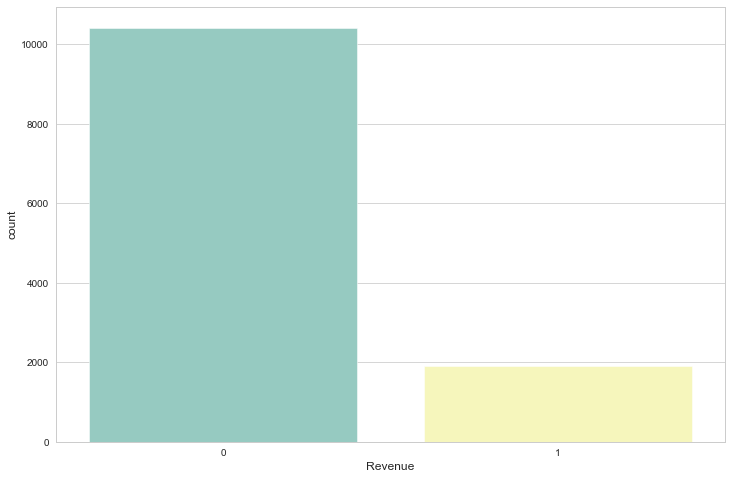

In [32]:
sns.countplot(df['Revenue'], palette='Set3')

In [33]:
print("There are {}% target values with 1".format(100 * df["Revenue"].value_counts()[1]/df.shape[0]))

There are 15.474452554744525% target values with 1


In [34]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

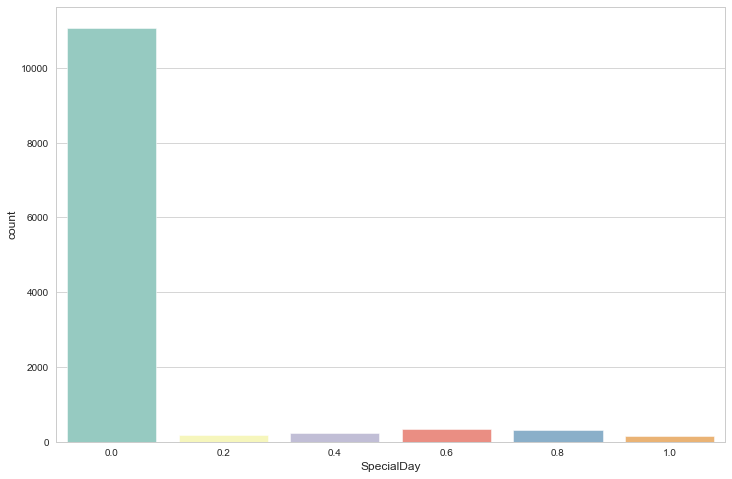

In [36]:
sns.countplot(df['SpecialDay'], palette='Set3')

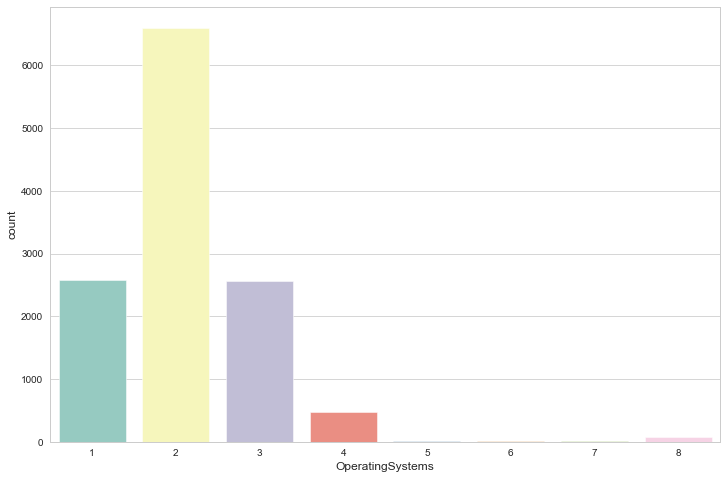

In [37]:
sns.countplot(df['OperatingSystems'], palette='Set3')

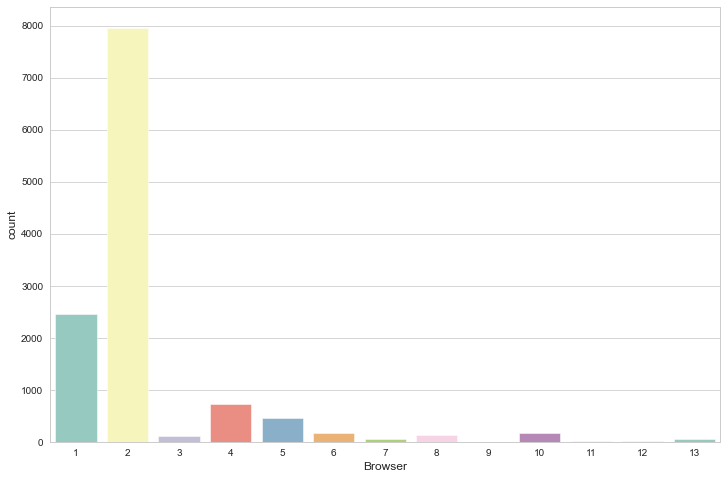

In [38]:
sns.countplot(df['Browser'], palette='Set3')

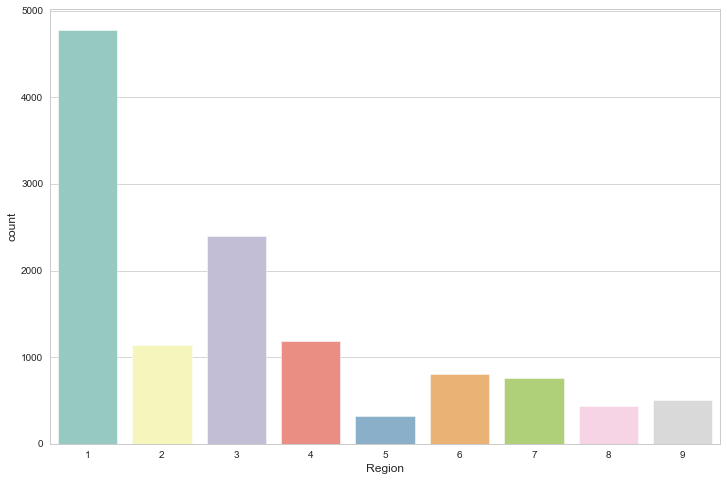

In [39]:
sns.countplot(df['Region'], palette='Set3')

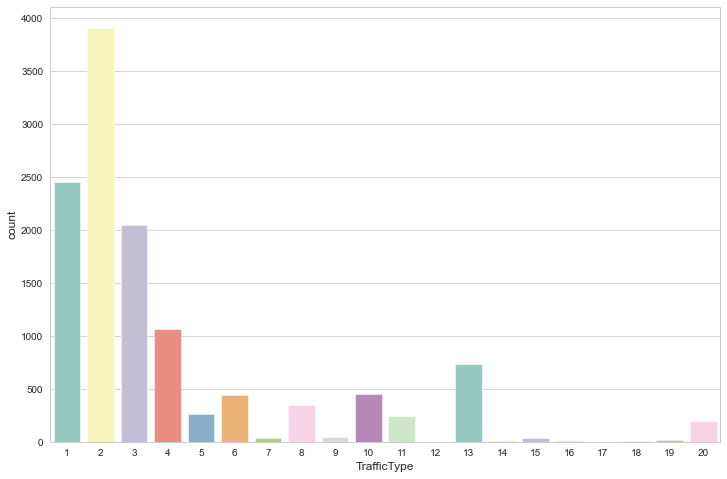

In [40]:
sns.countplot(df['TrafficType'], palette='Set3')

This bar graph shows that the percentage of visitor who visited the different type of pages. Around 50% of the users visit the administrative type of page and almost all of them visit the product pages as well.

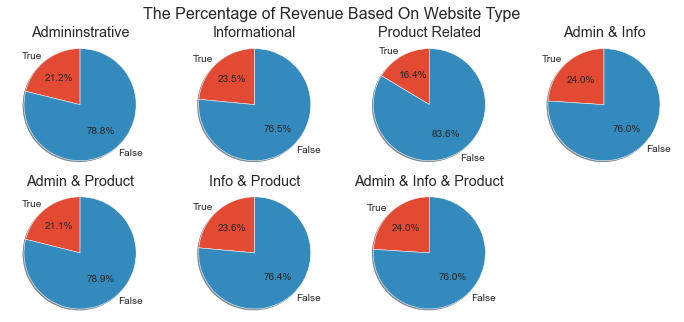

In [42]:
no_column = 0
fig, ax = plt.subplots(2,4, figsize= (12,5))
plt.suptitle('The Percentage of Revenue Based On Website Type', fontsize = 16)
for i in range(2):
    for k in range(4):
        ax[i,k].pie([df_website_percentage.iloc[1,no_column], 100-df_website_percentage.iloc[1,no_column]], autopct='%1.1f%%', labels = ['True', 'False'] ,shadow=True, startangle=90 )
        ax[i,k].axis('equal')
        ax[i,k].set_title(df_website_percentage.columns[no_column])
        no_column += 1
        if no_column == 7:
           fig.delaxes(ax.flatten()[7])
           break

plt.show()

In [43]:
df_website_percentage

,Admininstrative,Informational,Product Related,Admin & Info,Admin & Product,Info & Product,Admin & Info & Product
Website Usage,52.124899,19.505272,93.876723,16.074615,51.889700,19.448500,16.066504
Revenue Rate,21.160728,23.492723,16.371490,23.965691,21.100344,23.561301,23.977789


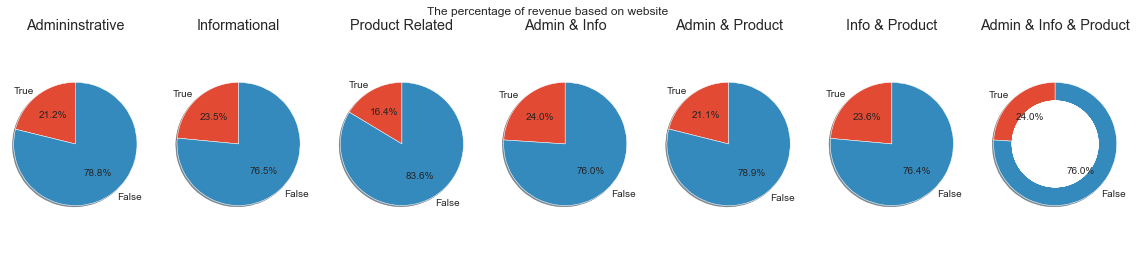

In [44]:
fig, ax = plt.subplots(1,7, figsize = (20,4))
plt.suptitle('The percentage of revenue based on website')
for i, col_title in enumerate(df_website_percentage):
    ax[i].pie([df_website_percentage.loc['Revenue Rate',col_title], 100- df_website_percentage.loc['Revenue Rate',col_title]],autopct='%1.1f%%', labels = ['True', 'False'] ,shadow=True, startangle=90 )
    ax[i].set_title(col_title)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax[i].axis('equal')
    
plt.show()

When the website users visit all page together, they more likely make purchase.

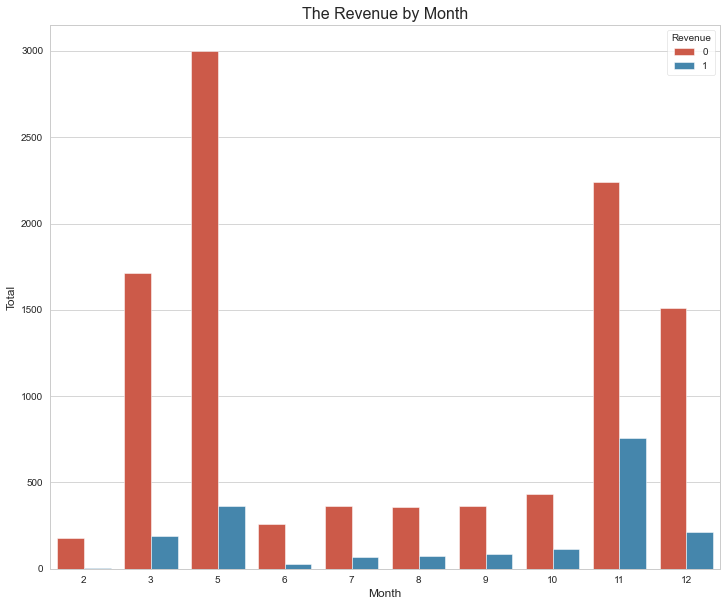

In [45]:
 # The Revenue by Month
sums_revenue = pd.DataFrame(df.groupby(['Month', 'Revenue'])['Revenue'].count().rename('Total')).sort_values(by = ['Total'], ascending = False)
sums_revenue.reset_index(inplace = True)
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(x = sums_revenue.Month, y = sums_revenue.Total, hue = sums_revenue.Revenue)
plt.title('The Revenue by Month', fontsize = 16 )
plt.show()

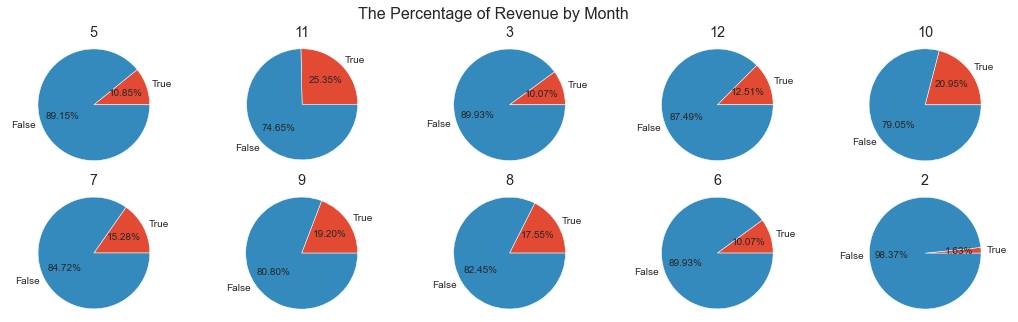

In [46]:
fig, ax = plt.subplots(2,5, figsize = (18,5))
no_month = 0
plt.suptitle('The Percentage of Revenue by Month', fontsize = 16)
for i in range(2):
    for k in range(5):
        temp_percentage = sums_revenue[(sums_revenue['Month'] == sums_revenue['Month'].unique()[no_month] )&(sums_revenue['Revenue'] == True)]['Total'] / sums_revenue[sums_revenue['Month'] == sums_revenue['Month'].unique()[no_month]]['Total'].sum() * 100
        temp_percentage = pd.Series([temp_percentage, 100- temp_percentage])
        ax[i,k].pie(temp_percentage, autopct = '%.2f%%', labels = ['True', 'False'])
        ax[i,k].set_title(sums_revenue['Month'].unique()[no_month])
        ax[i,k].axis('equal')
        no_month += 1

As can be seen from the pie charts, September October, and November have higher revenue rate. The users who visit the websites more likely make a purchase.

The new visitors have lower exit rates.

In [ ]:
# Correlation Matrix
import seaborn as sns
dataset_interval = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Revenue']]
correlation_matrix = dataset_interval.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation_matrix, annot =True, annot_kws = {'size': 10})
plt.xticks(rotation = 30)

Bounce Rate and Exit Rate is highly correlated.

In [ ]:
sns.jointplot(data = df, x= 'ExitRates', y = 'BounceRates', kind = 'reg')
plt.suptitle('Exit and Bounce Rate Correlation', fontsize = 16)
plt.show()

In [ ]:
sns.jointplot(data = df, x = 'ProductRelated_Duration', y = 'ProductRelated',kind = 'reg' )
sns.jointplot(data = df, x = 'Administrative_Duration', y = 'Administrative',kind = 'reg' )
plt.show()

### K-means clustering
<font color=green>From the results that we gathered from feature selection, there is evidence to show that how long a user stays on a page is a significant factor is determining whether he/she decides to purchase an item. To understand further on which products/items are the ones that stand out from the rest, we dive in deeper to the product page category.

In [ ]:
numeric_df.drop(columns = "BounceRates", inplace=True)
numeric_df.drop(columns = "ExitRates", inplace=True)

<font color=green>To analyse the product page category, we filter for the columns where the Administrative and Informational category are not included (meaning the values for them are 0) and store them in product_df

In [ ]:
filter_admin = numeric_df['Administrative'] == 0
filter_info = numeric_df['Informational'] == 0
filter_pdt = numeric_df['ProductRelated'] != 0
product_df = numeric_df[filter_admin & filter_info & filter_pdt]

<font color=green>Normalization of values takes place here to prepare the dataframe product_normal_df to carry out k-means clustering.

In [ ]:
product_normal_df = product_df[['ProductRelated','ProductRelated_Duration','Revenue']]
product_normal_df = (product_normal_df - product_normal_df.min()) / (product_normal_df.max() - product_normal_df.min())
product_normal_df.columns = ['NProductRelated', 'NProductRelated_Duration', 'NRevenue']
product_normal_df.head()

<font color=green>Normalization of values takes place here to prepare the dataframe product_normal_df to carry out k-means clustering.

### Duration of pages vs Revenue

In [ ]:
plt.figure(figsize = (15, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=df)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=df)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=df)

Insights:

High duration users are found for the initial types of pages (0-15: Administrative;0-10:Informational;0-300:Product Related)
Revenue hasn't been generated for the latter types
There is a linear relationship between product_related and Product duration (multicollinearity)

### Month Vs Page value Vs Revenue

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Page Value by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='Month', y='PageValues', data = df, palette='summer',hue='Revenue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.lineplot(x='Month', y='PageValues', data = df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

Insights:

The page value has considerably increased over the months with some fall in mid of the year
Page value is high when there is a revenue
There is a high variance in page value data considering each month

### Prepare Train Data

In [50]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                      int64
Revenue                      int64
Other                        uint8
Returning_Visitor            uint8
dtype: object

In [51]:
#split into X and y
X = df.iloc[:,6:-1].values
y = df.iloc[:,-1].values

In [52]:
#label encode the objects
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X[:,4] = le.fit_transform(X[:,4])
X[:,9] = le.fit_transform(X[:,9])
X[:,10] = le.fit_transform(X[:,10])

In [53]:
#split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lets begin the Classification

LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression()

In [55]:
#predict the values
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.05      0.10       350
           1       0.86      1.00      0.93      2116

    accuracy                           0.86      2466
   macro avg       0.88      0.53      0.51      2466
weighted avg       0.87      0.86      0.81      2466



Accuracy of Logistic Classifier is 86%

KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski', p = 2, n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
#predict the values
y_pred = classifier.predict(X_test)

In [60]:
#print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.16      0.23       350
           1       0.87      0.96      0.92      2116

    accuracy                           0.85      2466
   macro avg       0.64      0.56      0.57      2466
weighted avg       0.81      0.85      0.82      2466



Accuracy of KNN Classifier is 85%

Support Vector Classifier

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [63]:
#predict the values
y_pred = classifier.predict(X_test)

In [64]:
#print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.03      0.05       350
           1       0.86      1.00      0.92      2116

    accuracy                           0.86      2466
   macro avg       0.84      0.51      0.49      2466
weighted avg       0.86      0.86      0.80      2466



The accuracy is 86%.